In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [26]:
os.chdir('C:\\Users\\Lenovo\\Downloads\\eBooks\\Data Scienc course\\data work')
win=pd.read_csv('winequality-red.csv',sep=',',header=0)
win.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [3]:
win.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
win.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

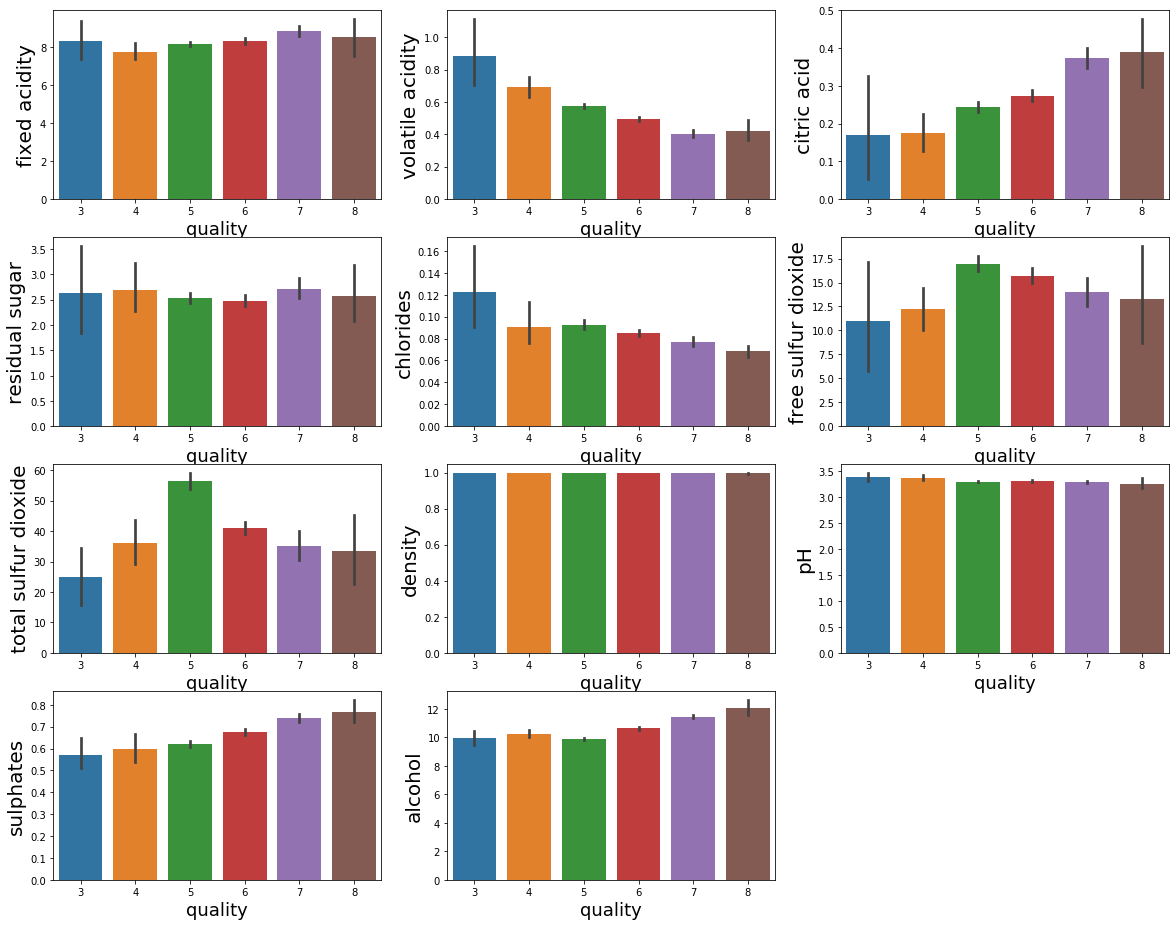

In [33]:
plt.figure(figsize=(20,16))
i=1
for col in win.columns[:-1] :
    plt.subplot(4,3,i)
    b=sns.barplot(x='quality',y=col,data=win)
    b.set_xlabel("quality",fontsize=18)
    b.set_ylabel(col,fontsize=20)
    i = i+1

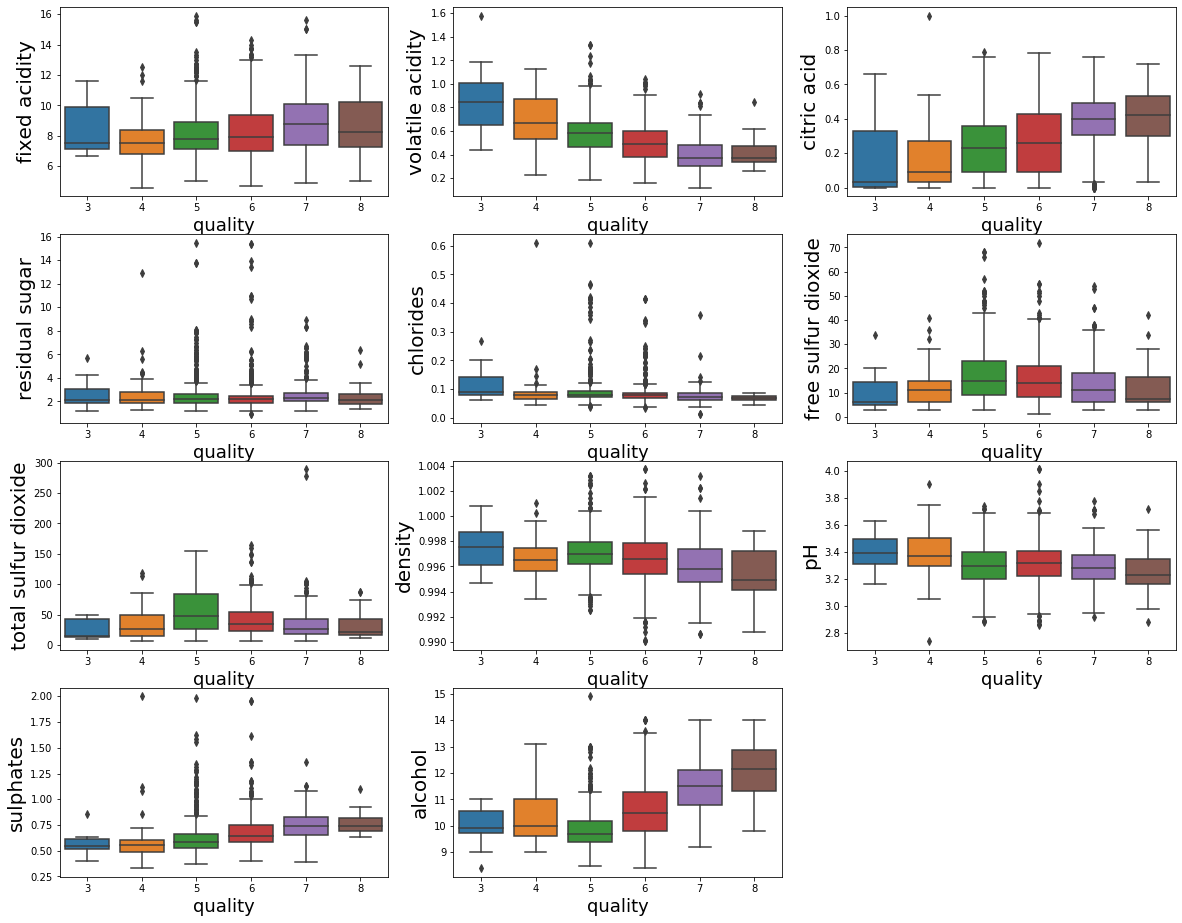

In [34]:
plt.figure(figsize=(20,16))
i=1
for col in win.columns[:-1] :
    plt.subplot(4,3,i)
    k=sns.boxplot(x='quality',y=col,data=win)
    k.set_xlabel("quality",fontsize=18)
    k.set_ylabel(col,fontsize=20)
    i = i+1

In [7]:
quality = win["quality"].values
category = []
for num in quality:
    if num<=5:
        category.append(0)
    elif num>=6:
        category.append(1)

In [8]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([win,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


1    855
0    744
Name: category, dtype: int64

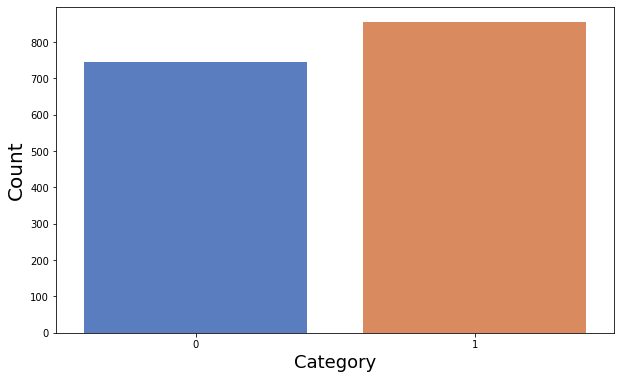

In [35]:
plt.figure(figsize=(10,6))
c=sns.countplot(data["category"],palette="muted")
c.set_xlabel("Category",fontsize=18)
c.set_ylabel("Count",fontsize=20)
data["category"].value_counts()

In [10]:
x=data.drop('category',axis=1)
y=data['category']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=53)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
clf=RandomForestClassifier(oob_score=True,n_estimators=400,random_state=53)

In [14]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=53, verbose=0,
                       warm_start=False)

In [15]:
clf.score(x_test,y_test)

0.8104166666666667

In [16]:
clf.oob_score_

0.8168007149240393

In [17]:
for w in range(400,600,30):
    clf=RandomForestClassifier(oob_score=True,n_estimators=w,random_state=53)
    clf.fit(x_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('oob score is'+str(oob))
    print ('********************')

For n_estimators = 400
oob score is0.8168007149240393
********************
For n_estimators = 430
oob score is0.8230563002680965
********************
For n_estimators = 460
oob score is0.8266309204647007
********************
For n_estimators = 490
oob score is0.8266309204647007
********************
For n_estimators = 520
oob score is0.8248436103663985
********************
For n_estimators = 550
oob score is0.8221626452189454
********************
For n_estimators = 580
oob score is0.8248436103663985
********************


In [18]:
clf=RandomForestClassifier(oob_score=True,n_estimators=490,random_state=53)

In [19]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.8166666666666667

In [20]:
clf.oob_score_

0.8266309204647007

In [21]:
clf.feature_importances_

array([0.0732792 , 0.09928304, 0.06598801, 0.05580573, 0.07851404,
       0.05833718, 0.10069184, 0.0905394 , 0.07076802, 0.12612925,
       0.18066429])

In [22]:
imp=pd.Series(clf.feature_importances_,index=x.columns.tolist())
imp.sort_values(ascending=False)

alcohol                 0.180664
sulphates               0.126129
total sulfur dioxide    0.100692
volatile acidity        0.099283
density                 0.090539
chlorides               0.078514
fixed acidity           0.073279
pH                      0.070768
citric acid             0.065988
free sulfur dioxide     0.058337
residual sugar          0.055806
dtype: float64

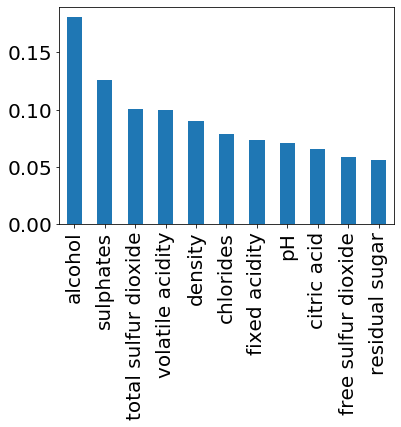

In [38]:
imp.sort_values(ascending=False).plot(kind='bar')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)